# Messy data

Many datasets cannot be clearly interpreted using either long-form or wide-form rules. If datasets that are clearly long-form or wide-form are “tidy”, we might say that these more ambiguous datasets are “messy”. In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with repeated-measures data, where it is natural to organize a table such that each row corresponds to the unit of data collection. Consider this simple dataset from a psychology experiment in which twenty subjects performed a memory task where they studied anagrams while their attention was either divided or focused:

명확하게 Long-form 형태와 Wide-form 형태로 규정되지 않는 데이터셋들도 있다.
데이터셋이 깔끔하게 Wide-form 이거나 Long-form 일경우 이런 모호한 데이터셋은 "지저분하다" 고 한다
"지저분한" 데이터셋에서 변수는 키나 테이블의 차원으로 고유하게 정의되지 않음
반복 측정 데이터에서 자주 발생하며, 각 행이 데이터 수집 단위에 해당하도록 테이블을 구성하는 것이 당연합니다. 
다음은 심리학실험 ( 20명의 피험자가 주의력이 분산되거나 집중된 상태에서 아나그램을 연구하는 기억 과제를 수행 )
데이터셋이다

In [2]:
import seaborn as sns

anagrams = sns.load_dataset('anagrams')
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [ ]:
subidr : ID
attnr : 주의 집중 상태 ( 집중 / 분산)
num1 : 실험1
num2 : 실험2
num3 : 실험3

주의 변수는 피험자 사이이지만 피험자 내 변수도 있습니다 : 
즉, 아나그램에 대한 가능한 해결책의 수는 1에서 3까지 다양함
종속 측정값은 점수
두 변수(숫자 및 점수)는 여러 열에 공동으로 인코딩
결과적으로 전체 데이터 세트는 Long-form도 아니고 Wide-form도 아님

어떻게 하면 평균점수를 주의력( 집중/분산 ) Solution의 함수로 표시할 수 있는지?
먼저 데이터를 두 가지 구조 중 하나로 통일해주어야함.
각 변수가 열이고 각 행이 관측치가 되도록 깔끔한 Long-form으로 변환
DataFrame.melt() 를 사용

In [9]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name = 'solutions', value_name = 'score')
anagrams_long

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0
5,6,divided,num1,5.0
6,7,divided,num1,5.0
7,8,divided,num1,5.0
8,9,divided,num1,2.0
9,10,divided,num1,6.0


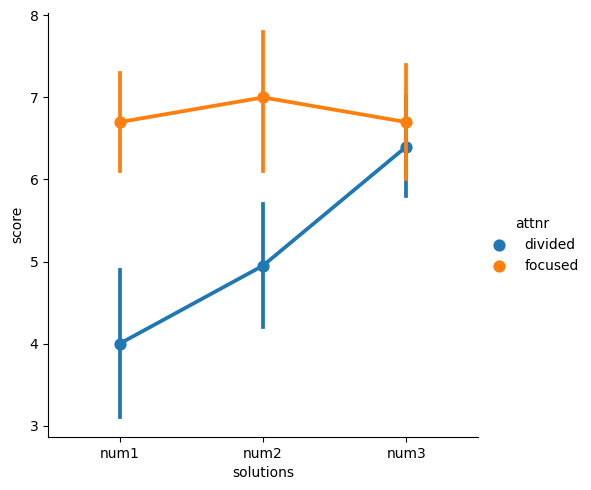

In [4]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

# Further reading and take-home points

For a longer discussion about tabular data structures, you could read the “Tidy Data” paper by Hadley Whickham. Note that seaborn uses a slightly different set of concepts than are defined in the paper. While the paper associates tidyness with long-form structure, we have drawn a distinction between “tidy wide-form” data, where there is a clear mapping between variables in the dataset and the dimensions of the table, and “messy data”, where no such mapping exists.

The long-form structure has clear advantages. It allows you to create figures by explicitly assigning variables in the dataset to roles in plot, and you can do so with more than three variables. When possible, try to represent your data with a long-form structure when embarking on serious analysis. Most of the examples in the seaborn documentation will use long-form data. But in cases where it is more natural to keep the dataset wide, remember that seaborn can remain useful.

 Table 형식 데이터 구조 =>  Hadley Whickham의 "Tidy Data"논문참고
 Seaborn은 논문에 정의된 것과 약간 다른 개념 집합을 사용
논문 => "깔끔함 == Long-form data"
데이터셋의 변수와 테이블의 차원사이에 명확한 매핑이 있는 "깔끔한 Wide-form data" 
                                                  매핑이 존재하지 않는 "지저분한 데이터"

Long- form data는 분명한 장점이 있다
Dataset의 변수를 파라미터에 명시적으로 할당 시각화. (세 개 이상의 변수로도 가능)

Seaborn Tutorial은 대부분 Long-form 데이터 사용하지만,
데이터셋을 넓은 형태로 유지하는 것이 더 자연스러운 경우에도
Seaborn 사용 ( Long-form이든 Wide-form이든 Seaborn 쓰라는 얘기인듯)